In [1]:
# Initializing stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [3]:
file_name = "ignore_dir/whatsapp_stats.json"
all_data_df = pd.read_json(file_name)
all_data_df.sample(10)

,author,date,dialog,dialog_type
5488,S,2016-06-18 10:39:00,Tu,default
6154,Brown Bear,2016-03-07 14:20:00,SBI mein gaya toh bhai education loan ka kar kuch,default
2223,Brown Bear,2016-02-14 11:54:00,Pencil challenge karna hai ab,default
912,Anil Kapoor,2015-11-13 00:16:00,Nahi,default
5391,Brown Bear,2016-06-16 22:44:00,Corona 550 ka hai,default
1617,Brown Bear,2016-01-20 22:56:00,Wahi,default
2613,N,2016-06-03 11:15:00,Kl hi pta chala...will be in mumbai,default
752,Brown Bear,2015-10-11 23:02:00,Koi aur jagah ata hoga na raste mein,default
5272,Brown Bear,2016-06-16 21:59:00,Kitne log hai aur,default
3207,Brown Bear,2016-03-31 21:52:00,Sahi camera crew hai,default


In [4]:
# Getting only the chat data, not the notif/message etc.
chat_df = all_data_df[all_data_df['dialog_type'] == 'default']
del chat_df['dialog_type']

In [5]:
# Find the total number of chats per person
chat_df.groupby(['author'])[['dialog']] \
    .count() \
    .sort_values('dialog', ascending=False) \
    .rename(columns={'dialog':'Number of Chats'})

,Number of Chats
author,
GSOC wala,1852
Brown Bear,1744
IIM wala,788
Anil Kapoor,678
Me,511
Bolts,343
R,225
N,194
S,179


In [6]:
# Plotting the timeline for chats
from datetime import datetime
timeline_df = chat_df

timeline_df['date'] = timeline_df['date'].apply(datetime.time)
timeline_df.head(15)

,author,date,dialog
2,IIM wala,21:13:00,<Media omitted>
3,GSOC wala,23:49:00,Kal ka plan karo
4,Bolts,21:00:00,http://m.shopclues.com/cow-dung-cakes-gobar-up...
5,Bolts,21:04:00,Sab kuch online milta hai bc
6,GSOC wala,01:32:00,<Media omitted>
7,IIM wala,13:17:00,<Media omitted>
8,Bolts,13:45:00,Bhai aadi ko maro sabse phele bc phir jaha jan...
9,Bolts,13:46:00,Ab toh woh chala jayega phir
10,Bolts,13:46:00,Agle 5 se 6 years ke bday bumps bhi sath mein
11,Bolts,13:47:00,Ha wahi bc gmat dene ki jarurat nahi hai


In [10]:
del timeline_df['dialog']
timeline_df.head(10)

,author,date
2,IIM wala,21:13:00
3,GSOC wala,23:49:00
4,Bolts,21:00:00
5,Bolts,21:04:00
6,GSOC wala,01:32:00
7,IIM wala,13:17:00
8,Bolts,13:45:00
9,Bolts,13:46:00
10,Bolts,13:46:00
11,Bolts,13:47:00


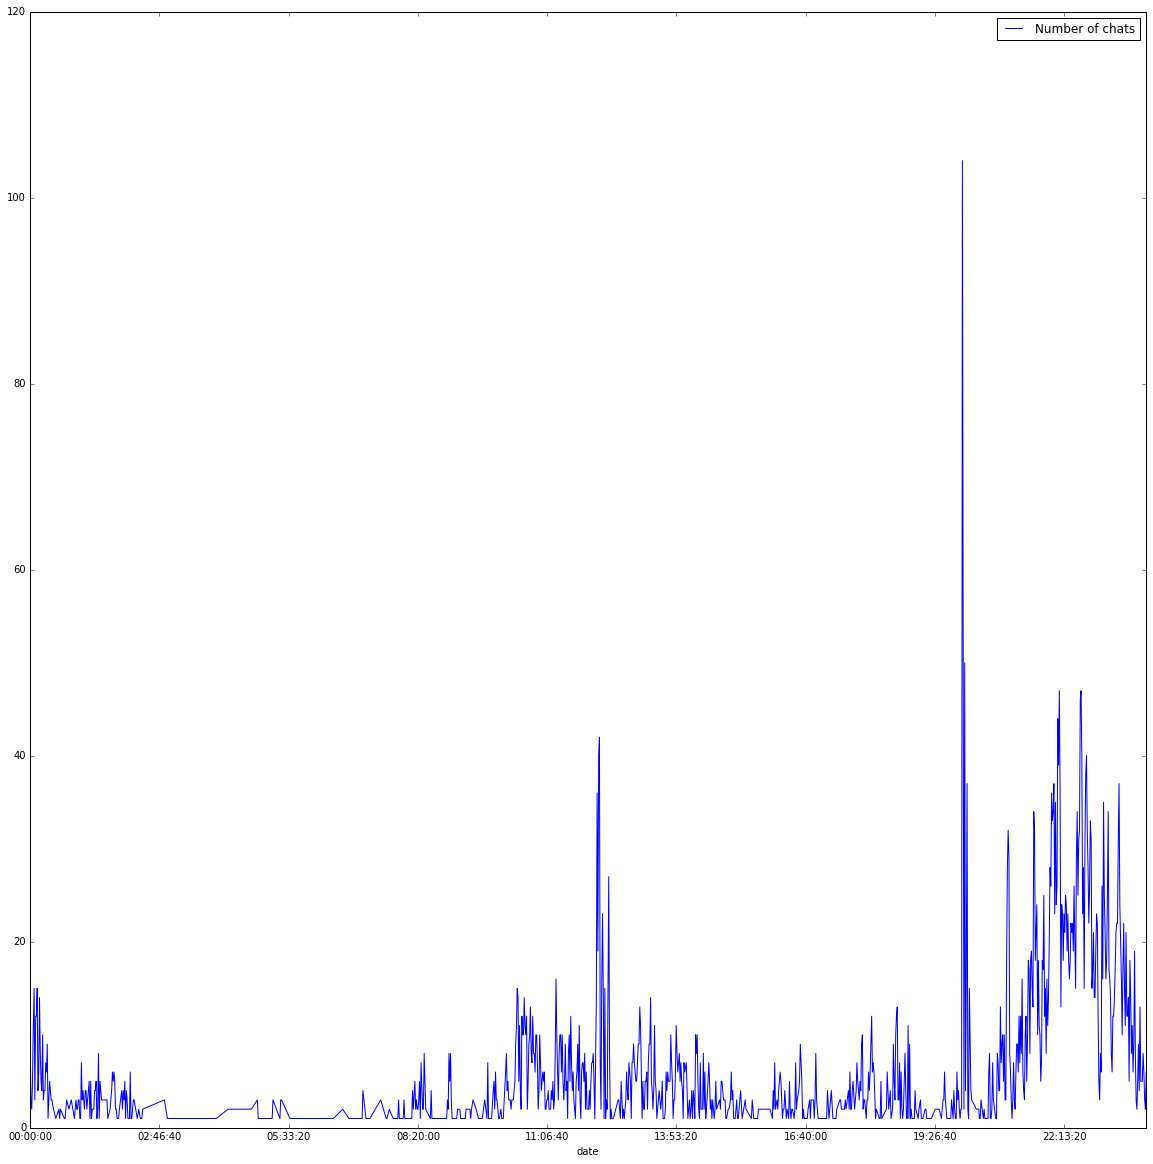

In [37]:
time_range = timeline_df.groupby(['date'])[['date']].count().rename(columns={'date': 'Number of chats'})
time_range.plot(figsize=(20, 20))